## House Prices: Using only the feature 'OverallQual'
Both [recursive feature elimination](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example) and [permutation importance](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example)
indicate that by far the most significant numerical feature of the [House Prices data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) is `OverallQual`. This feature ranges from 1 to 10 where 1 corresponds to *Very Poor* and 10 is *Very Excellent*. This is perhaps not so surprising; from the name *overall quality* one can imagine that it originates from the considered opinion of an expert in the matter, for example that of a [real estate broker](https://en.wikipedia.org/wiki/Real_estate_broker) or the like, *i.e.* someone who has [domain knowledge](https://en.wikipedia.org/wiki/Domain_knowledge). If that is the case, then this feature is more than just pure data, but is really a model in its-self. With this in mind I thought it would be interesting to make some extremely simple models of this feature, and this feature alone, just to see how well it can do on the leaderboard. 

This notebook consists of the following sections:
* [Visualisation](#Visualisation) of `OverallQual`
* [Model #1:](#model1) The mean value: $\bar y$
* [Model #2:](#model2) A straight line fit: $y = mx + c$
* [Model #3:](#model3) A univariate quadratic function: $y = ax^2 + bx +c$
* [Model #4:](#model4) An exponential fit: $y = A \exp(Bx)$
* [Summary](#summary)

All fitting will be performed using the [NumPy](https://numpy.org/) [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) routine.
As we will be using various models we shall work 'offline' rather than submit to the public leaderboard.
(To see how to do this look at the notebook: ["House Prices: How to work offline"](https://www.kaggle.com/carlmcbrideellis/house-prices-how-to-work-offline)).

In [1]:
#!/usr/bin/python3
# coding=utf-8
#===========================================================================
# load up the libraries etc.
#===========================================================================
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.metrics import mean_squared_log_error
pd.options.mode.chained_assignment = None 

In [2]:
#===========================================================================
# read in the data
#===========================================================================
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#===========================================================================
# also, read in the 'solution' data 
#===========================================================================
solution   = pd.read_csv('../input/house-prices-advanced-regression-solution-file/submission.csv')
y_true     = solution["SalePrice"]

#===========================================================================
# select only ONE feature: OverallQual
#===========================================================================
features = ['OverallQual']

#===========================================================================
X_train       = train_data[features]
y_train       = train_data["SalePrice"]
final_X_test  = test_data[features]

## 1. Visualisation <a class="anchor" id="Visualisation"></a>
First let us take a look at what we are dealing with by making a scatter plot of the `SalePrice` with respect to the `OverallQual`:

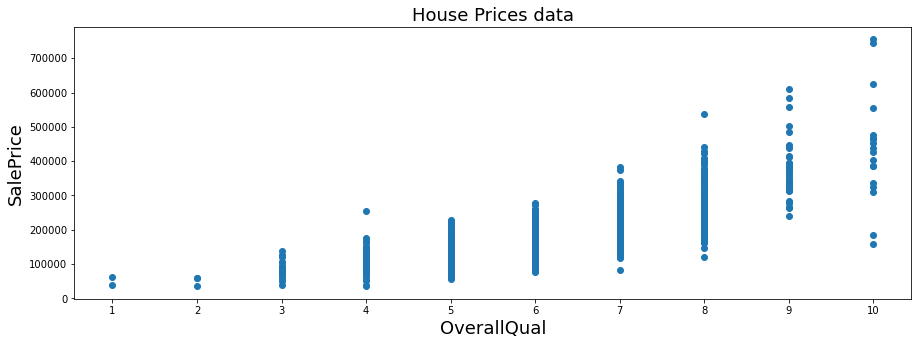

In [3]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(X_train,y_train)
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

## Model #1: Mean value: $\bar y$ <a class="anchor" id="model1"></a>

The mean price is 180921.19589041095
The score is 0.42578


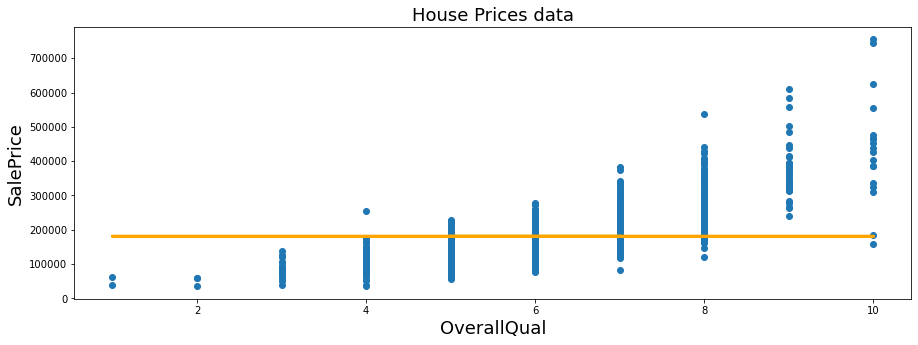

In [4]:
# The model:
mean_price = y_train.mean()
print("The mean price is", mean_price)
final_X_test.loc[:,'y_pred'] = mean_price
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )

#===========================================================================
# compare the model to the data
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
plt.plot(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',linewidth=3)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

## Model #2: Straight line fit: $y = mx + c$ <a class="anchor" id="model2"></a>

The score is 1.00433


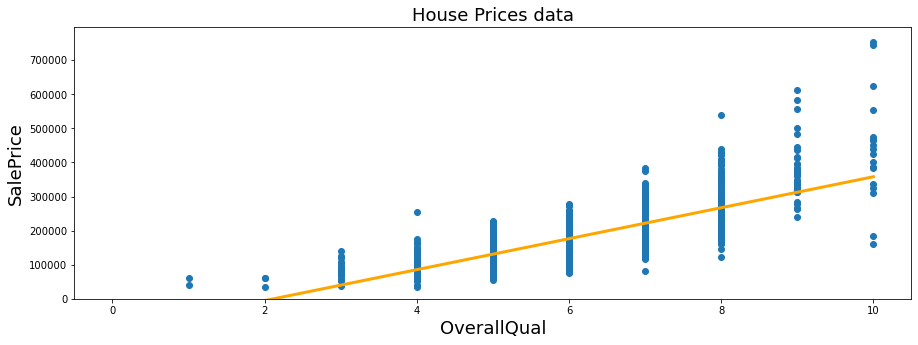

In [5]:
# The model:
fit = (np.polyfit(X_train['OverallQual'], y_train, 1 ))
c = fit[1]
m = fit[0]
final_X_test.loc[:,'y_pred'] = (m*final_X_test['OverallQual'] + c)
# set any negative prices to be zero:
final_X_test.loc[final_X_test.y_pred < 0, 'y_pred'] = 0
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )

#===========================================================================
# compare the model to the data
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
x = np.linspace(0,10,100)
y = m*x + c
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18)
ax.set_ylim(ymin=0);

## Model #3: A univariate quadratic function: $y = ax^2 + bx +c$ <a class="anchor" id="model3"></a>

The score is 0.24416


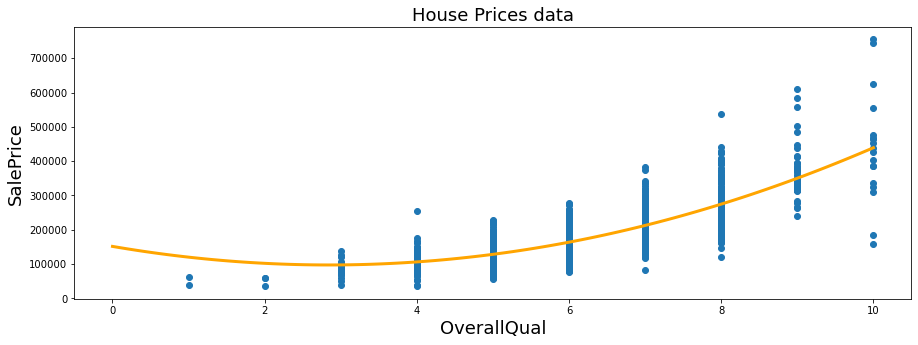

In [6]:
# The model:
fit = (np.polyfit(X_train['OverallQual'], y_train, 2 ))
c = fit[2]
b = fit[1]
a = fit[0]
final_X_test.loc[:,'y_pred'] = (a*final_X_test['OverallQual']**2 +b*final_X_test['OverallQual'] + c)
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )

#===========================================================================
# compare the model to the data
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
y = a*x**2 + b*x + c
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

## Model #4: Exponential fit: $y = A \exp(Bx)$ <a class="anchor" id="model4"></a>

The score is 0.22898


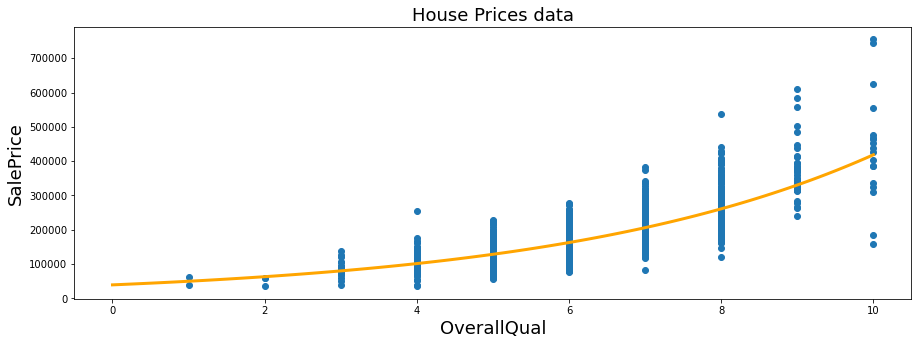

In [7]:
# The model:
fit = (np.polyfit(X_train['OverallQual'], np.log(y_train), 1))
A = np.exp(fit[1])
B = fit[0]
final_X_test.loc[:,'y_pred'] = (A*np.exp(B*final_X_test['OverallQual']))
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )

#===========================================================================
# compare the model to the data
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
y = A*np.exp(B*x)
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

# Summary <a class="anchor" id="summary"></a>

| Model | score | 
| :--- | --- |
| #1: mean value only | 0.42578 | 
| #2:  straight line fit| 1.00433 | 
| #3: univariate quadratic function| 0.24416 | 
| #4: exponential fit| 0.22898 | 


From this we can see that the 'best' model is the [exponential fit](#model4), with a leaderboard score of 0.22898.
This score, though not worthy of any medals, would actually place in the top 85% of the [Public Leaderboard](http://https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard).


It is worth commenting as to why the straight line fit is so bad. This is because my model crosses the $x$-axis at `OverallQual`=2.117. It is important to know that the score is calculated using the root of the [mean squared logarithmic error regression loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html), i.e. by using [the following equation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error): <br>

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n_{   \mathrm{samples}    }}  \sum_{i=0}^{n_{    \mathrm{samples} }-1} \left( \ln (1+y_i) - \ln (1+ \hat y_i) \right)^2 }  $$

where $\hat y_i$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value. When the price falls below 0 the natural logarithm is undefined. To avoid this I set the `SalePrice` for houses having a `OverallQual` $\leq 2$ to be zero (not very realistic, I know), which leads to a significant penalty in the score.

# References
* [Dean De Cock "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project", Journal of Statistics Education, Volume 19, Number 3 (2011)](http://jse.amstat.org/v19n3/decock.pdf) + [Supplementary Materials](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)